<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/Regresja_liniowa_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
#precisions -> precyzja drukowanych liczb po przecinku
#suppress -> bardzo małe liczby, bliskie zeru, zostaną zapisane w postaci naukowej lub jako zero, aby uniknąć niepotrzebnych zer na wydruku
#edgeitems -> Dla macierzy o więcej niż 30 elementach wzdłuż jednego wymiaru, zostaną drukowane tylko pierwsze 30 elementów, a reszta będzie pominięta
#linewidth -> Ustala maksymalną szerokość linii dla drukowania macierzy.
#Gdy macierz przekracza tę szerokość, drukowanie zostanie podzielone na wiele linii dla czytelności
#formatter -> liczby zmiennoprzecinkowe zostaną sformatowane z dwoma miejscami po przecinku.
sns.set(font_scale=1.3)#skala trzcionki dla wykresów
sklearn.__version__

'1.2.2'

In [2]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=50.0, random_state=42)

# n_samples -> Określa liczbę próbek (wierszy) generowanych danych
# n_featuers -> Określa liczbę cech (kolumn) generowanych danych
# n_targets -> Określa liczbę docelowych zmiennych (wartości wyjściowych) generowanych danych

# noise -> Pozwala to sprawdzić, jak dobrze model radzi sobie z niestabilnościami danych i czy jest w stanie generalizować wzorce pomimo obecności szumu
# im noise mniejszy tym robi sie to bardziej w postaci wykresu funkcji liniowej

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


[]

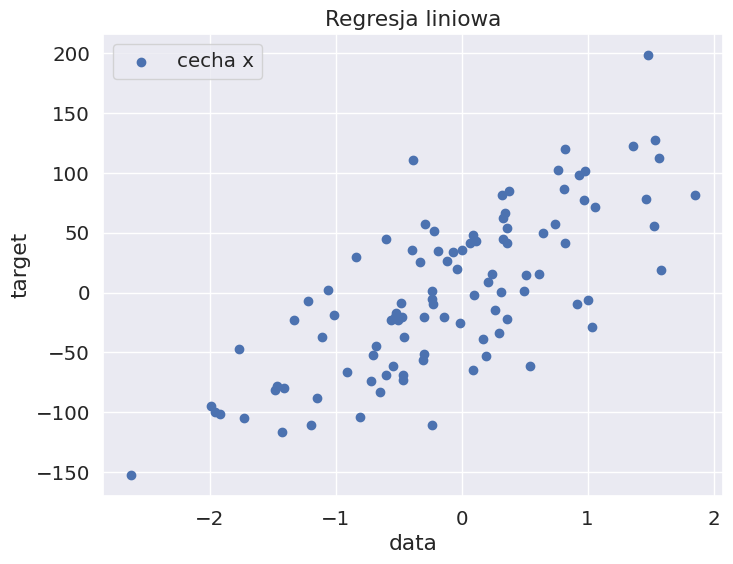

In [3]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot()

Y = w0 + w1 * X1

In [4]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

# metoda fit() dopasowuje model liniowy do danych
linear.fit(data, target)

LinearRegression()

In [5]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
linear.score(data, target)

0.5606306161971462

In [6]:
# metoda predict() dokonuje predykcji na podstawie modelu
y_pred = linear.predict(data)
y_pred

array([57.25, 10.63, -52.58, 23.18, -20.64, 41.59, -19.77, 35.79, 39.60, 61.24, 51.21, 90.76, 46.60, -6.31, -38.82,
       10.89, -102.39, 34.17, 62.76, -138.84, 33.25, 11.19, -19.89, 56.38, 92.23, 86.76, -27.34, 3.85, -27.40, -60.23,
       25.55, 26.57, 20.24, -23.43, -44.32, 16.70, -10.69, 25.80, 51.25, -10.28, 25.78, -31.56, 89.93, -22.79, -7.10,
       -15.83, -10.80, -29.80, 23.98, 17.36, -12.27, 6.11, -7.10, 87.44, -15.44, 24.80, 24.12, -4.43, -7.13, -103.93,
       23.72, -6.64, -55.27, -32.94, -74.99, 59.32, -89.43, -99.83, -25.22, 48.20, 50.69, -72.16, -75.82, -61.59,
       -40.52, 93.03, 59.70, 19.19, 22.18, -24.24, -91.53, 11.95, 15.29, -67.52, 64.20, -0.56, -20.10, 5.08, -50.10,
       -1.81, -57.73, 80.72, 9.55, -21.88, -19.61, 108.11, -72.85, -33.93, 1.85, -11.25])

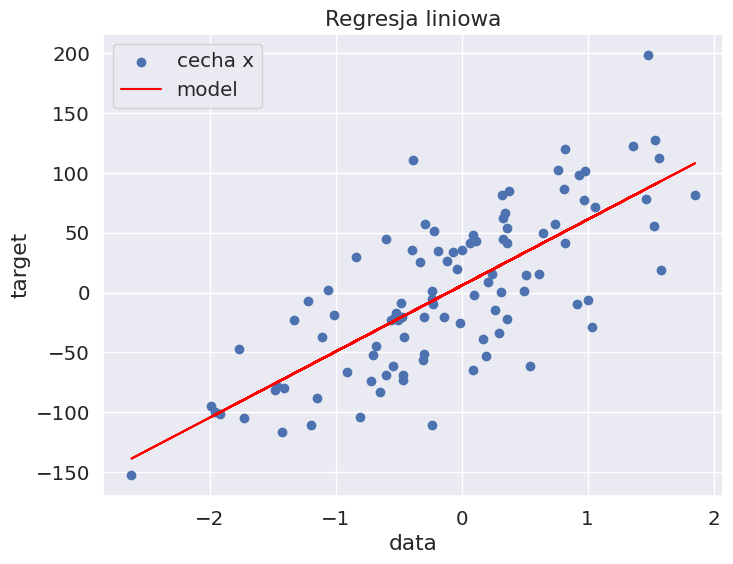

In [7]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

### <a name='4'></a> Współczynnik $R^{2}$
Współczynnik $R^2$ jest zdefiniowany jako $1 - \frac{u}{v}$, gdzie $u$ jest określone wzorem
```
((y_true - y_pred) ** 2).sum()
```
oraz $v$ jako
```
((y_true - y_true.mean()) ** 2).sum()
```
Czyli
```
1 - (((y_true - y_pred) ** 2).sum()) / (((y_true - y_true.mean()) ** 2).sum())
```
Najlepszą możliwą wartością jest 1.0. $R^{2}$ może przyjmować wartość ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma współczynnik $R^2$ równy 0.

In [8]:
[item for item in dir(linear) if not item.startswith('_')]

#intercept -> punkt przeciecia z osią OY

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

COEF przykład:

X = [[1], [2], [3], [4]] # Cechy

y = [2, 4, 6, 8]  # Wartości docelowe

model = LinearRegression()

model.fit(X, y)

Wynik bedzie równy 2 jako dwukrotność

In [9]:
linear.coef_

array([55.22])

In [10]:
linear.intercept_

5.825576602634865

### <a name='5'></a> Końcowa postać modelu

Wychodzi na to, że w1 to linear_coef_ , a w0 to linear.intercept_

$$Y = w_0 + w_1X_1$$
Postać modelu: $$Y = 5.82 + 55.22 \cdot X_1$$

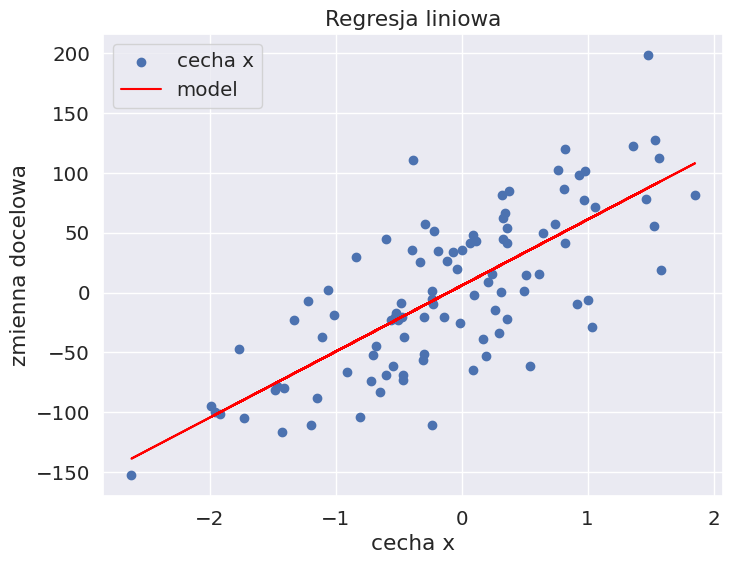

In [11]:
# Wykres tylko, że ze wzoru:

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, linear.intercept_ + linear.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

Nowe dane wraz z podziałem na zbiór testowy i treningowy

In [12]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (800, 1)
X_test shape: (200, 1)
y_train shape: (800,)
y_train shape: (800,)


[]

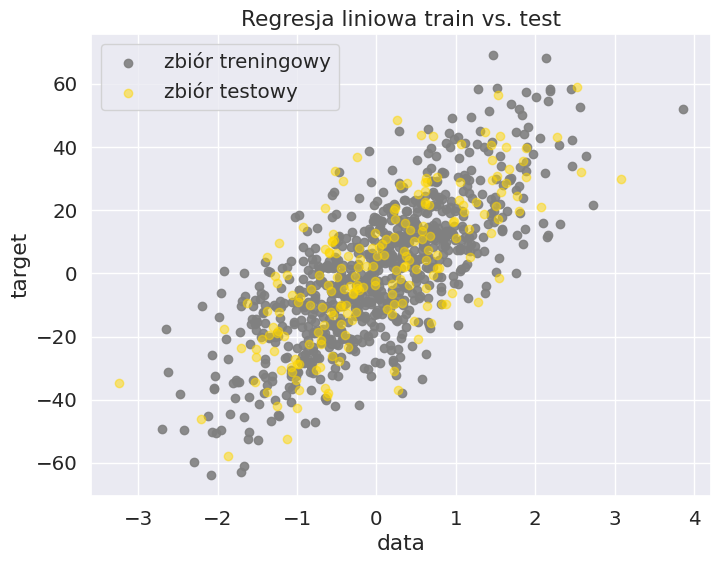

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('data')
plt.ylabel('target')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.9)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [16]:
linear.score(X_train, y_train)

0.5488325060027172

In [17]:
#dane ktorych nie widzial
linear.score(X_test, y_test)

0.5246092756332335

[]

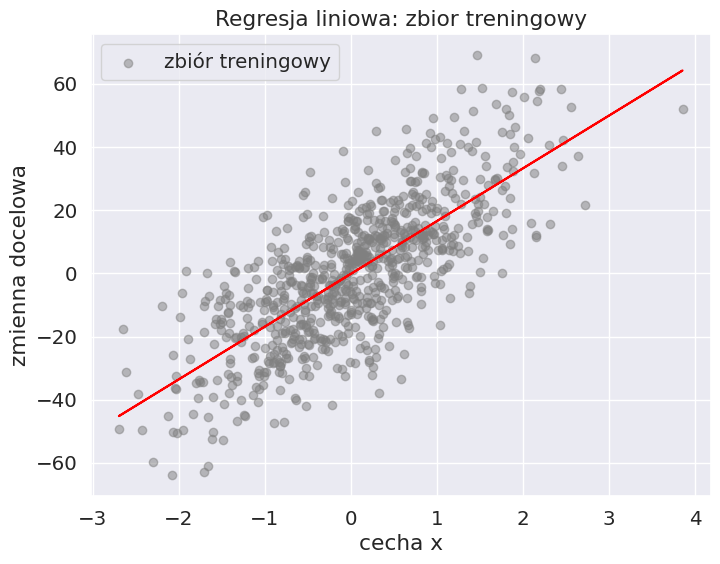

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, linear.intercept_ + linear.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

Zbiór testowy = dane, których model nie widział

[]

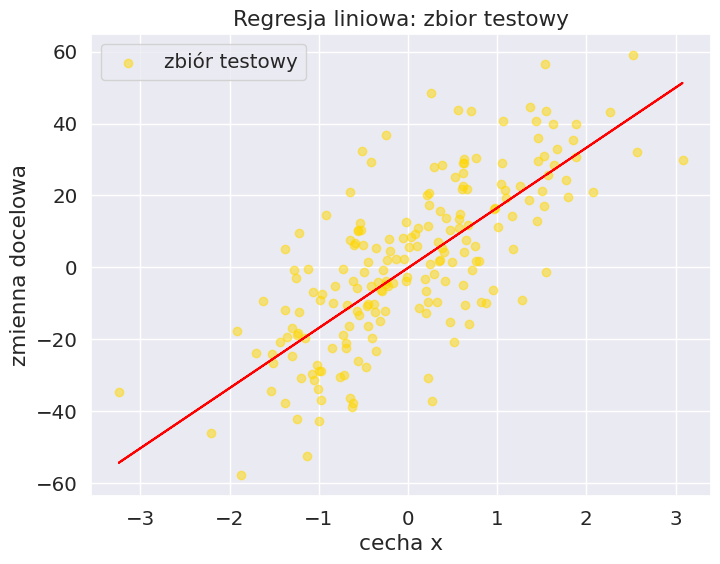

In [21]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, linear.intercept_ + linear.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()

Predykcja na podstawie modelu

In [24]:
y_pred = linear.predict(X_test) #wstawiamy to czego nasz model nie widział czyli X_test

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
# y_true = to co rzeczywiscie zostało zaobserwowane
# y_pred = to co model przewidział
predictions.head()

,y_true,y_pred
0,30.876983,25.296865
1,1.850537,5.740809
2,30.604981,31.292315
3,-9.092543,-16.601035
4,-36.311708,-10.936951


In [25]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.296865,5.580119
1,1.850537,5.740809,-3.890272
2,30.604981,31.292315,-0.687334
3,-9.092543,-16.601035,7.508492
4,-36.311708,-10.936951,-25.374757


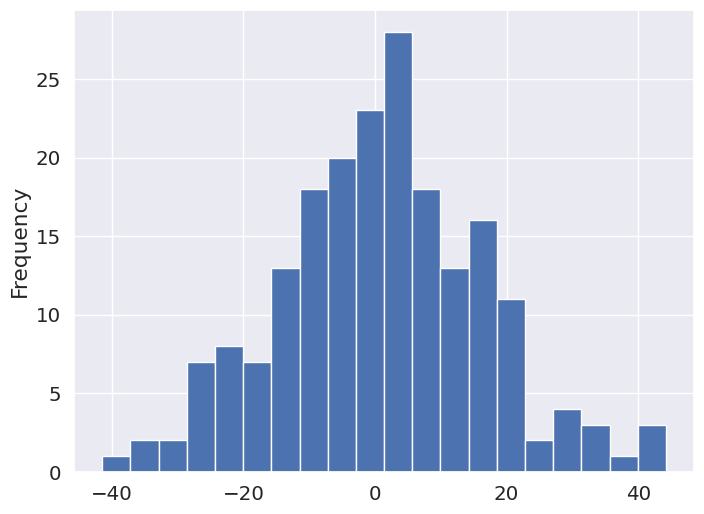

In [31]:
_ = predictions['error'].plot(kind='hist', bins=20, figsize=(8, 6))

In [29]:
len(predictions)

200